# TASK 1 - Prediction using Supervised ML

# To Predict the percentage of marks of the students based on the number of study hours.

In [1]:
## Importing important libraries---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Importing Dataset-
path =  "http://bit.ly/w-data"
Data = pd.read_csv(path)
print("Data is successfully imported")
Data

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
## Now print the first 5 records...

Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
## Now print the last 5 records...
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
## Here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Let's print the full summary of the dataframe .
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualizing Data.

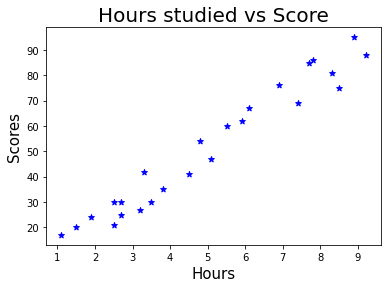

In [7]:
## Ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=20)
plt.scatter(Data.Hours,Data.Scores,color='blue',marker='*')
plt.show()

# This "SCATTER PLOT" indicates positive linear relationship as much as hours You study is a chance of high scoring.

In [8]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Preparing Data and splitting into train and test sets.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [11]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


# Training the Model.

In [12]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [13]:
## Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [14]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.018160041434683 
B1 = [9.91065648]


In [15]:
## Plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train

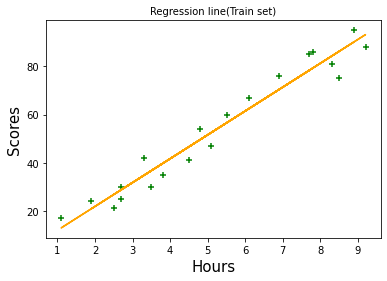

In [16]:
## Plotting on train data
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

# Test Data.

In [17]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
## Now print the Y_test.
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

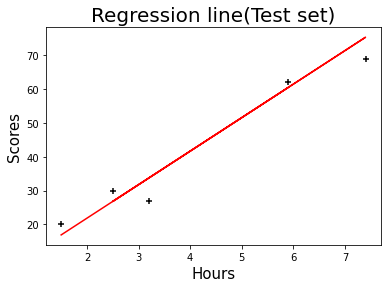

In [19]:
## Plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=20)
plt.show()

# Comparing Actual vs Predicted Scores.¶

In [20]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# ACCURACY OF THE MODEL.¶

In [21]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)##Goodness of fit Test

0.9454906892105356

# Above 94% percentage indicates that above fitted Model is a GOOD MODEL.




# # Predicting the Error

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


# Predicting the score¶

In [24]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


# CONCLUSION:

# From the above result we can say that if a studied for 9.25 then student will secured 93.69 MARKS.

# Completed task#1